In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('df_scaled.csv')

In [2]:
#Base dataframe shape and first 10 contents for future refrence
print(df.shape)
df.head(10)

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.000000,0.0,0.0,0.0,0.001418,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.000000,0.0,0.0,0.0,0.002837,0.001000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.000000,0.0,0.0,0.0,0.001418,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.000000,0.0,0.0,0.0,0.002837,0.000042,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.000000,0.0,0.0,0.0,0.014184,0.009809,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.000000,0.0,0.0,0.0,0.026950,0.002411,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.000000,0.0,0.0,0.0,0.001418,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,0.037037,0.0,0.0,0.0,0.000000,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.000000,0.0,0.0,0.0,0.002837,0.000578,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.000000,0.0,0.0,0.0,0.004255,0.011536,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


For the following - looking to see if I can spot any trends/groups based on whether revenue was true or false

In [3]:
df.groupby('Revenue')['VisitorType'].describe()

,count,unique,top,freq
Revenue,,,,
False,10422,3,Returning_Visitor,9081
True,1908,3,Returning_Visitor,1470


Returning visitors are the most frequent which isn't surprising, however I wasn't expecting three unique values in this column!

In [4]:
df.groupby('Revenue')['VisitorType'].value_counts()

Revenue  VisitorType      
False    Returning_Visitor    9081
         New_Visitor          1272
         Other                  69
True     Returning_Visitor    1470
         New_Visitor           422
         Other                  16
Name: VisitorType, dtype: int64

Not too sure what to make of the 'Other' visitor type, going to look at the summary of those visitors and see if there's anything particularly outstanding about them.

In [5]:
df[df['VisitorType'] == 'Other'].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,85.0,0.054466,0.092960,0.000000,0.000000,0.000000,0.111111,0.518519
Administrative_Duration,85.0,0.018447,0.059994,0.000000,0.000000,0.000000,0.016035,0.486061
Informational,85.0,0.007353,0.028879,0.000000,0.000000,0.000000,0.000000,0.166667
Informational_Duration,85.0,0.004584,0.023455,0.000000,0.000000,0.000000,0.000000,0.161020
ProductRelated,85.0,0.017689,0.037037,0.001418,0.002837,0.007092,0.021277,0.314894
ProductRelated_Duration,85.0,0.008916,0.019761,0.000000,0.000461,0.002134,0.008404,0.150534
BounceRates,85.0,0.038551,0.078438,0.000000,0.000000,0.000000,0.000000,0.200000
ExitRates,85.0,0.063349,0.071112,0.000667,0.011111,0.033333,0.100000,0.200000
PageValues,85.0,0.050286,0.146987,0.000000,0.000000,0.000000,0.000000,0.997760
SpecialDay,85.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
df[df['VisitorType'] != 'Other'].describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12245.0,0.085964,0.123187,0.0,0.000000,0.037037,0.148148,1.0
Administrative_Duration,12245.0,0.023816,0.051954,0.0,0.000000,0.002354,0.027540,1.0
Informational,12245.0,0.021077,0.053040,0.0,0.000000,0.000000,0.000000,1.0
Informational_Duration,12245.0,0.013584,0.055362,0.0,0.000000,0.000000,0.000000,1.0
ProductRelated,12245.0,0.045199,0.063189,0.0,0.009929,0.025532,0.053901,1.0
ProductRelated_Duration,12245.0,0.018743,0.029961,0.0,0.002911,0.009419,0.023010,1.0
BounceRates,12245.0,0.022078,0.048201,0.0,0.000000,0.003175,0.016923,0.2
ExitRates,12245.0,0.042932,0.048378,0.0,0.014286,0.025137,0.050000,0.2
PageValues,12245.0,0.016043,0.049965,0.0,0.000000,0.000000,0.000000,1.0
SpecialDay,12245.0,0.061854,0.199540,0.0,0.000000,0.000000,0.000000,1.0


From what I can gather, a lot of people who got categorized as 'Other' were fairly consistent in Operating System, Browser, Region, and TrafficType, with the values for 50% and 75% being the same. Slightly amusing that none of the Other visitors went to the website on a 'Special Day,' but not too surprising considering the small amount of people in that group. Doubtful if it means anything. 

In [7]:
df.groupby('Revenue')['PageValues'].describe()

,count,mean,std,min,25%,50%,75%,max
Revenue,,,,,,,,
False,10422.0,0.005462,0.025078,0.0,0.000000,0.000000,0.000000,0.682099
True,1908.0,0.075366,0.097279,0.0,0.010065,0.046323,0.107523,1.000000


All of the percentiles being 0 in the False category seems incorrect, but considering the very small mean might just be a symptom of that. 

In [8]:
df.groupby('Revenue')['PageValues'].value_counts()

Revenue  PageValues
False    0.000000      9230
         0.073378         2
         0.000105         1
         0.000358         1
         0.000416         1
                       ... 
True     0.722823         1
         0.748513         1
         0.795972         1
         0.997760         1
         1.000000         1
Name: PageValues, Length: 2710, dtype: int64

I went back to my wrangling to see what exactly Page Values was in reference to since the large amount at 0 is somewhat baffling and now it makes sense why so many in the False group have that value:

"Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The large amount of 0's makes sense now.

In [9]:
df.groupby('Revenue')['ProductRelated'].describe()

,count,mean,std,min,25%,50%,75%,max
Revenue,,,,,,,,
False,10422.0,0.040730,0.057794,0.0,0.008511,0.022695,0.049645,1.000000
True,1908.0,0.068383,0.082649,0.0,0.021277,0.041135,0.080851,0.757447


In [10]:
df.groupby('Revenue')['ProductRelated_Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Revenue,,,,,,,,
False,10422.0,0.016725,0.028196,0.0,0.002360,0.007975,0.020818,1.000000
True,1908.0,0.029328,0.036143,0.0,0.008471,0.017349,0.035421,0.422204


It looks like people tended to only quickly look at products instead of spending time on the individual page, and those who bought something tended to stay on pages longer and look at more products. Seems consistent with what one would do either when window shopping or going somewhere with the intention to buy something.

In [11]:
df.groupby('Revenue')['Informational'].describe()

,count,mean,std,min,25%,50%,75%,max
Revenue,,,,,,,,
False,10422.0,0.018826,0.050483,0.0,0.0,0.0,0.000000,1.0
True,1908.0,0.032757,0.063382,0.0,0.0,0.0,0.041667,0.5


In [12]:
df.groupby('Revenue')['Informational_Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Revenue,,,,,,,,
False,10422.0,0.011860,0.052526,0.0,0.0,0.0,0.000000,1.000000
True,1908.0,0.022598,0.067318,0.0,0.0,0.0,0.007453,0.693373


In [13]:
df.groupby('Revenue')['Administrative'].describe()

,count,mean,std,min,25%,50%,75%,max
Revenue,,,,,,,,
False,10422.0,0.078435,0.118610,0.0,0.0,0.000000,0.111111,1.000000
True,1908.0,0.125689,0.138168,0.0,0.0,0.074074,0.185185,0.962963


In [14]:
df.groupby('Revenue')['Administrative_Duration'].describe()

,count,mean,std,min,25%,50%,75%,max
Revenue,,,,,,,,
False,10422.0,0.021696,0.050318,0.0,0.0,0.000000,0.024421,1.000000
True,1908.0,0.035155,0.059173,0.0,0.0,0.015408,0.044453,0.613976


While I can't exactly define what an Informational and Administrative page would be, the fact that those who bought something looked at more pages and stayed on these pages longer makes sense to me.

In [15]:
#Dividing the original dataframe into sub-dataframes that might be useful in looking for trends
returning = df[df['VisitorType'] == 'Returning_Visitor']
new = df[df['VisitorType'] == 'New_Visitor']
other = df[df['VisitorType'] == 'Other'] #might end up splitting this so that I only have 'returning' and 'new' visitors
buyer = df[df['Revenue'] == True]
looking = df[df['Revenue'] == False]

Looking at a summary of each new dataframe I've created:

In [16]:
returning.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,10551.0,0.084591,0.126754,0.0,0.000000,0.037037,0.148148,1.000000
Administrative_Duration,10551.0,0.023298,0.052614,0.0,0.000000,0.000000,0.025892,1.000000
Informational,10551.0,0.022229,0.054832,0.0,0.000000,0.000000,0.000000,1.000000
Informational_Duration,10551.0,0.014553,0.058012,0.0,0.000000,0.000000,0.000000,1.000000
ProductRelated,10551.0,0.048344,0.066715,0.0,0.011348,0.026950,0.058156,1.000000
ProductRelated_Duration,10551.0,0.020156,0.031692,0.0,0.002986,0.010247,0.025100,1.000000
BounceRates,10551.0,0.024778,0.050325,0.0,0.000000,0.005263,0.020000,0.200000
ExitRates,10551.0,0.046505,0.049916,0.0,0.016071,0.028331,0.052440,0.200000
PageValues,10551.0,0.013838,0.042632,0.0,0.000000,0.000000,0.000000,0.706453
SpecialDay,10551.0,0.068543,0.209071,0.0,0.000000,0.000000,0.000000,1.000000


In [17]:
new.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,1694.0,0.094517,0.097692,0.0,0.000000,0.074074,0.148148,0.592593
Administrative_Duration,1694.0,0.027043,0.047530,0.0,0.000000,0.014174,0.033431,0.572563
Informational,1694.0,0.013897,0.039384,0.0,0.000000,0.000000,0.000000,0.416667
Informational_Duration,1694.0,0.007546,0.033935,0.0,0.000000,0.000000,0.000000,0.697883
ProductRelated,1694.0,0.025610,0.026370,0.0,0.009929,0.018440,0.032624,0.407092
ProductRelated_Duration,1694.0,0.009948,0.011979,0.0,0.002603,0.006475,0.013224,0.202956
BounceRates,1694.0,0.005261,0.026312,0.0,0.000000,0.000000,0.000000,0.200000
ExitRates,1694.0,0.020681,0.028727,0.0,0.006897,0.013333,0.024691,0.200000
PageValues,1694.0,0.029777,0.080687,0.0,0.000000,0.000000,0.000000,1.000000
SpecialDay,1694.0,0.020189,0.116428,0.0,0.000000,0.000000,0.000000,1.000000


In [18]:
buyer.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,1908.0,0.125689,0.138168,0.0,0.000000,0.074074,0.185185,0.962963
Administrative_Duration,1908.0,0.035155,0.059173,0.0,0.000000,0.015408,0.044453,0.613976
Informational,1908.0,0.032757,0.063382,0.0,0.000000,0.000000,0.041667,0.500000
Informational_Duration,1908.0,0.022598,0.067318,0.0,0.000000,0.000000,0.007453,0.693373
ProductRelated,1908.0,0.068383,0.082649,0.0,0.021277,0.041135,0.080851,0.757447
ProductRelated_Duration,1908.0,0.029328,0.036143,0.0,0.008471,0.017349,0.035421,0.422204
BounceRates,1908.0,0.005117,0.012185,0.0,0.000000,0.000000,0.006452,0.200000
ExitRates,1908.0,0.019555,0.016463,0.0,0.009521,0.016000,0.025000,0.200000
PageValues,1908.0,0.075366,0.097279,0.0,0.010065,0.046323,0.107523,1.000000
SpecialDay,1908.0,0.023166,0.123521,0.0,0.000000,0.000000,0.000000,1.000000


In [19]:
looking.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,10422.0,0.078435,0.118610,0.0,0.000000,0.000000,0.111111,1.000000
Administrative_Duration,10422.0,0.021696,0.050318,0.0,0.000000,0.000000,0.024421,1.000000
Informational,10422.0,0.018826,0.050483,0.0,0.000000,0.000000,0.000000,1.000000
Informational_Duration,10422.0,0.011860,0.052526,0.0,0.000000,0.000000,0.000000,1.000000
ProductRelated,10422.0,0.040730,0.057794,0.0,0.008511,0.022695,0.049645,1.000000
ProductRelated_Duration,10422.0,0.016725,0.028196,0.0,0.002360,0.007975,0.020818,1.000000
BounceRates,10422.0,0.025317,0.051877,0.0,0.000000,0.004255,0.020000,0.200000
ExitRates,10422.0,0.047378,0.051231,0.0,0.015560,0.028571,0.053846,0.200000
PageValues,10422.0,0.005462,0.025078,0.0,0.000000,0.000000,0.000000,0.682099
SpecialDay,10422.0,0.068432,0.209054,0.0,0.000000,0.000000,0.000000,1.000000


I'm probably only going to try and classify based on whether Revenue = True or not so the more important data frames are 'Buyer' and 'Looking' but I thought that looking at new and returning customers could be interesting.

Because of the huge imbalance between those who bought something vs those who didn't, I'm sampling a random 1000 from each dataframe just to get an idea of the distribution (hopefully) without skewing results.

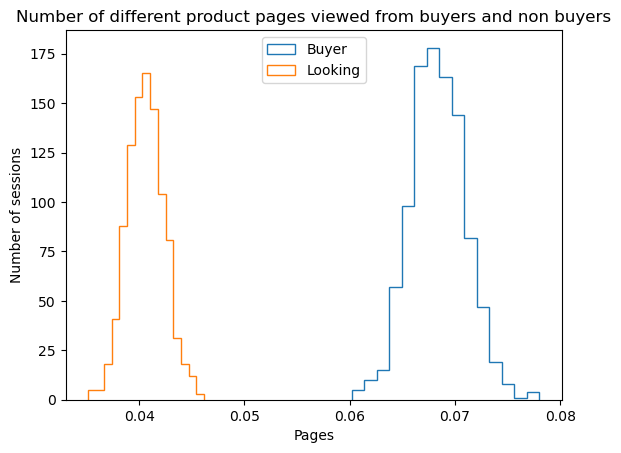

In [20]:
np.random.seed(40)
bprod_means = [np.mean(np.random.choice(buyer['ProductRelated'], 1000)) for i in range(1000)]
lprod_means = [np.mean(np.random.choice(looking['ProductRelated'], 1000)) for i in range(1000)]

fig, ax = plt.subplots()
ax.hist(bprod_means, label='Buyer', bins=15, histtype='step')
ax.hist(lprod_means, label='Looking', bins=15, histtype='step')

ax.set_title('Number of different product pages viewed from buyers and non buyers')
ax.set_xlabel('Pages')
ax.set_ylabel('Number of sessions')
ax.legend()
plt.show()

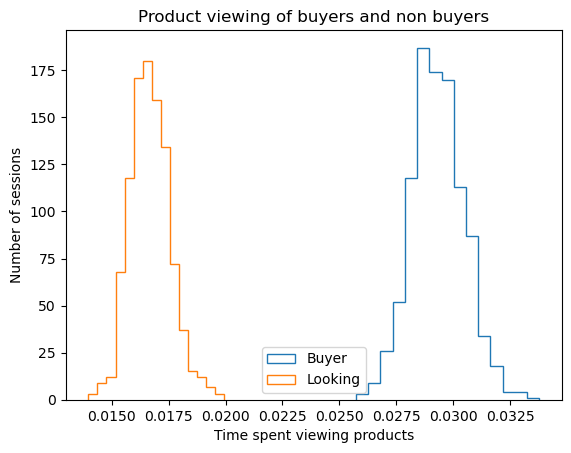

In [21]:
np.random.seed(40)
bprod_means = [np.mean(np.random.choice(buyer['ProductRelated_Duration'], 1000)) for i in range(1000)]
lprod_means = [np.mean(np.random.choice(looking['ProductRelated_Duration'], 1000)) for i in range(1000)]

fig, ax = plt.subplots()
ax.hist(bprod_means, label='Buyer', bins=15, histtype='step')
ax.hist(lprod_means, label='Looking', bins=15, histtype='step')

ax.set_title('Product viewing of buyers and non buyers')
ax.set_xlabel('Time spent viewing products')
ax.set_ylabel('Number of sessions')
ax.legend()
plt.show()

I think it's interesting that people who were just browsing the site actually spent less time on product pages and didn't visit as many pages as those who were buyers. 

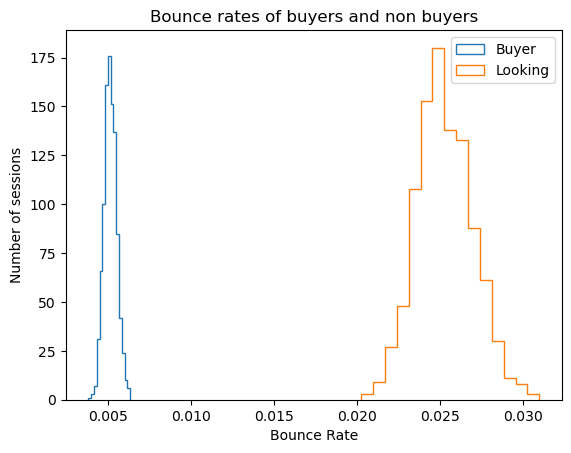

In [22]:
np.random.seed(60)
bbounce_means = [np.mean(np.random.choice(buyer['BounceRates'], 1000)) for i in range(1000)]
lbounce_means = [np.mean(np.random.choice(looking['BounceRates'], 1000)) for i in range(1000)]

fig, ax = plt.subplots()
ax.hist(bbounce_means, label='Buyer', bins=15, histtype='step')
ax.hist(lbounce_means, label='Looking', bins=15, histtype='step')

ax.set_title('Bounce rates of buyers and non buyers')
ax.set_xlabel('Bounce Rate')
ax.set_ylabel('Number of sessions')
ax.legend()
plt.show()

The fact that the above histograms have each group so seperate from each other is promising in that classification between buyers and those just browsing should be fairly successful. Below I create heatmaps just out of curiosity to see where correlations are the strongest in these two groups.

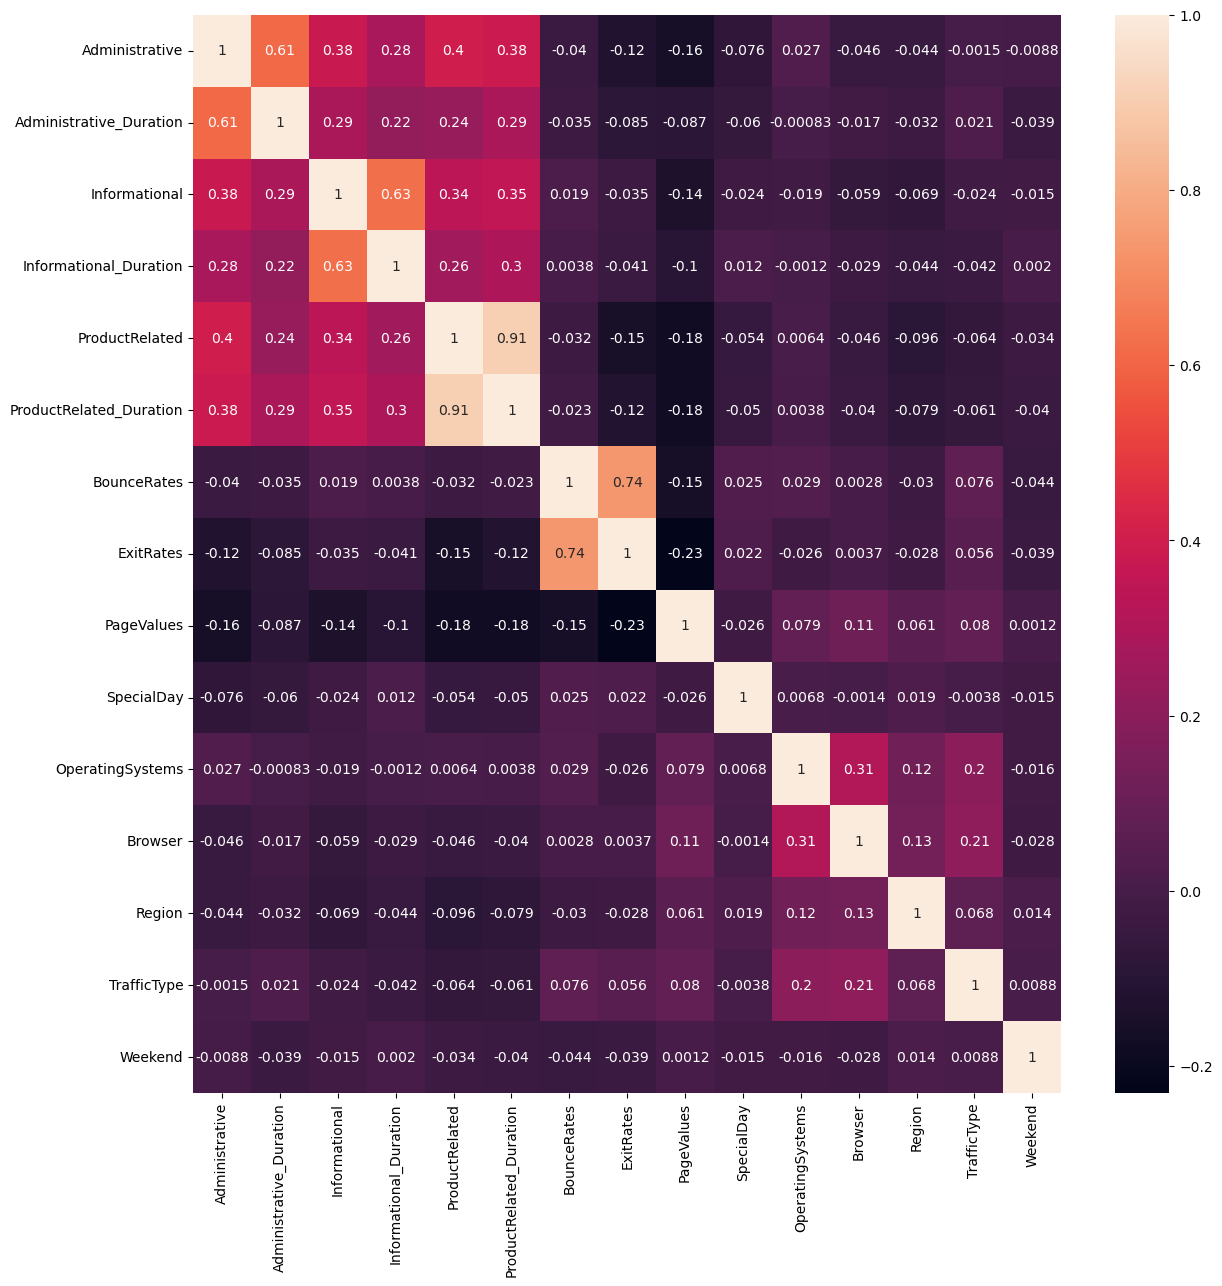

In [23]:
plt.figure(figsize=(14,14))
sns.heatmap(buyer.loc[:, buyer.columns != 'Revenue'].corr(numeric_only=True), annot=True)
plt.show()

Highest:
exit and bounce rates: .74
OS and browser: .31

Lowest:
pagevalues and exitrates: -.23
productrelated and pr_duration and pagevalues: -.18

Interesting that other than the page categories and their durations (and exit and bounce rates), OS and browser have a decently high correlation. Looking at the data and thinking about the situation, it does make sense that people who are buying a product are probably using similar platforms to make their purchases but it's not something that immediately pops into mind.

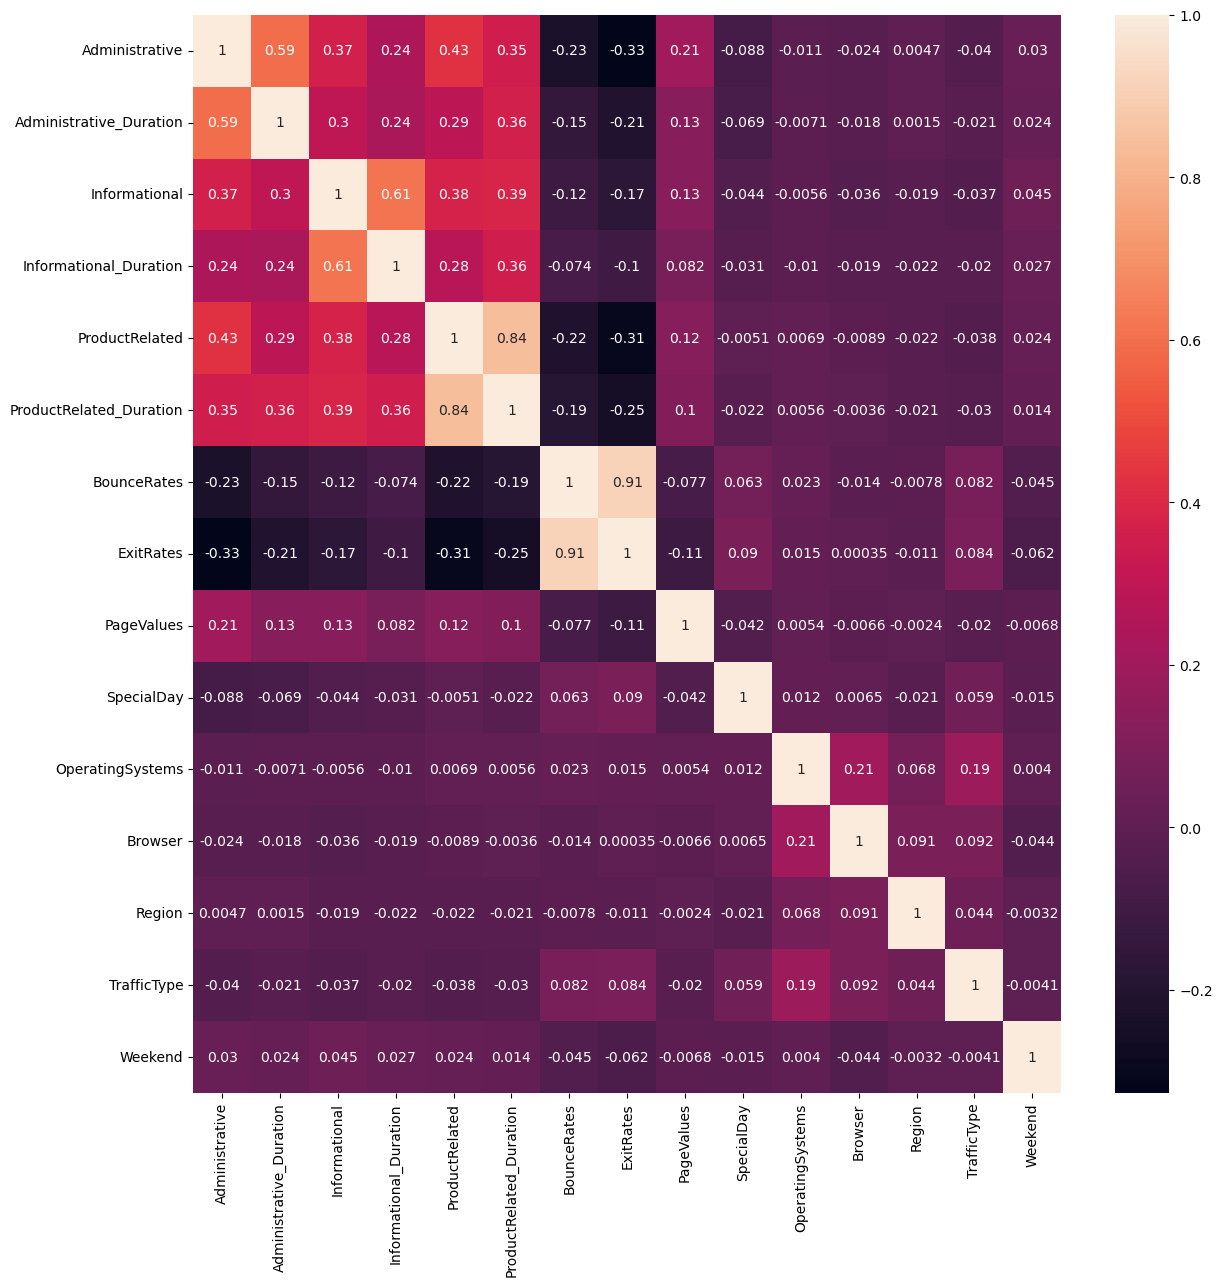

In [24]:
plt.figure(figsize=(14,14))
sns.heatmap(looking.loc[:, looking.columns != 'Revenue'].corr(numeric_only=True), annot=True)
plt.show()

Highest:
bouncerates and exitrates: .91
admin thru productrelated_duration: .23+

Lowest:
admin and exitrates - -.33
productrelated and exitrates - -.31

It's interesting to see the higher correlation in the page categories and their duration for the looking group vs the buyer group. Amusing that the exit and bounce rates for this group is the same correlation as the product related and duration for the buyer group. The positive correlations do seem to be pretty similar in value, though there are more negatively correlated groups in the lookers dataframe than the buyers - I wonder how much of an effect that might have on the classification.

Out of curiosity to see if types of visitors have similar separation I'm going to plot similar graphs below, once again sampling 1000 from each dataframe to try and adjust for size discrepancy:

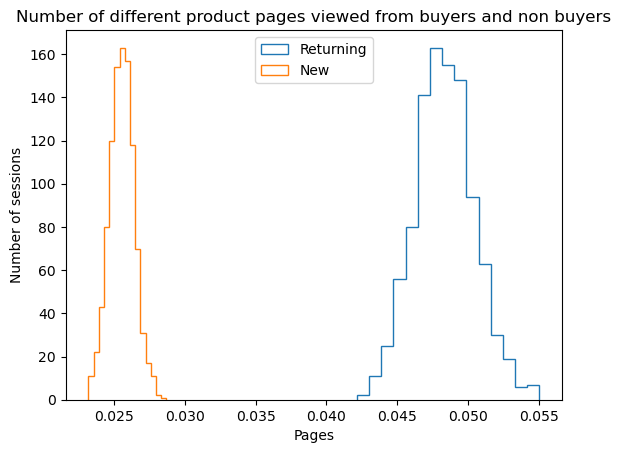

In [25]:
np.random.seed(40)
bprod_means = [np.mean(np.random.choice(returning['ProductRelated'], 1000)) for i in range(1000)]
lprod_means = [np.mean(np.random.choice(new['ProductRelated'], 1000)) for i in range(1000)]

fig, ax = plt.subplots()
ax.hist(bprod_means, label='Returning', bins=15, histtype='step')
ax.hist(lprod_means, label='New', bins=15, histtype='step')

ax.set_title('Number of different product pages viewed from buyers and non buyers')
ax.set_xlabel('Pages')
ax.set_ylabel('Number of sessions')
ax.legend()
plt.show()

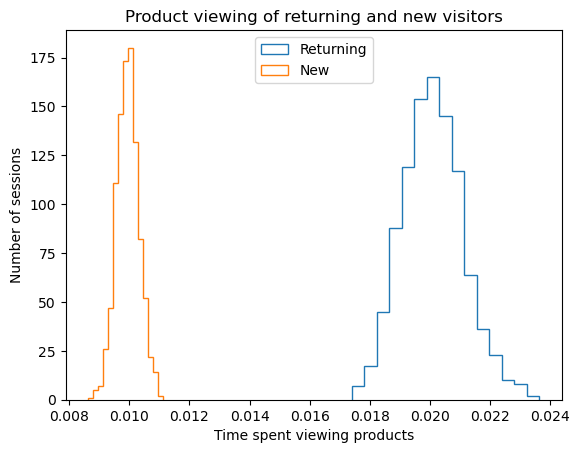

In [26]:
np.random.seed(20)
returning_means = [np.mean(np.random.choice(returning['ProductRelated_Duration'], 1000)) for i in range(1000)]
new_means = [np.mean(np.random.choice(new['ProductRelated_Duration'], 1000)) for i in range(1000)]

fig, ax = plt.subplots()
ax.hist(returning_means, label='Returning', bins=15, histtype='step')
ax.hist(new_means, label='New', bins=15, histtype='step')

ax.set_title('Product viewing of returning and new visitors')
ax.set_xlabel('Time spent viewing products')
ax.set_ylabel('Number of sessions')
ax.legend()
plt.show()

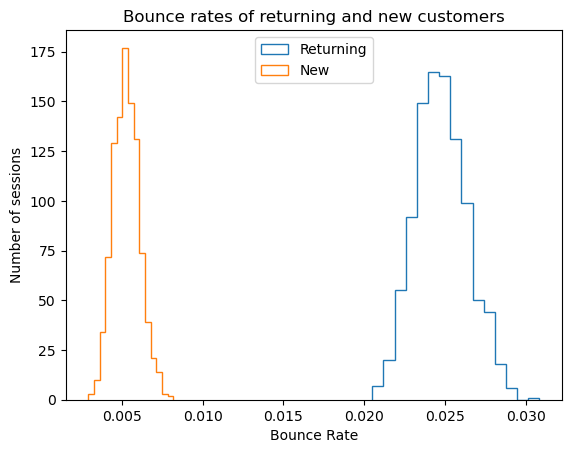

In [27]:
np.random.seed(60)
rbounce_means = [np.mean(np.random.choice(returning['BounceRates'], 1000)) for i in range(1000)]
nbounce_means = [np.mean(np.random.choice(new['BounceRates'], 1000)) for i in range(1000)]

fig, ax = plt.subplots()
ax.hist(rbounce_means, label='Returning', bins=15, histtype='step')
ax.hist(nbounce_means, label='New', bins=15, histtype='step')

ax.set_title('Bounce rates of returning and new customers')
ax.set_xlabel('Bounce Rate')
ax.set_ylabel('Number of sessions')
ax.legend()
plt.show()

This also seems promising...I decided to create heatmaps for these as well:

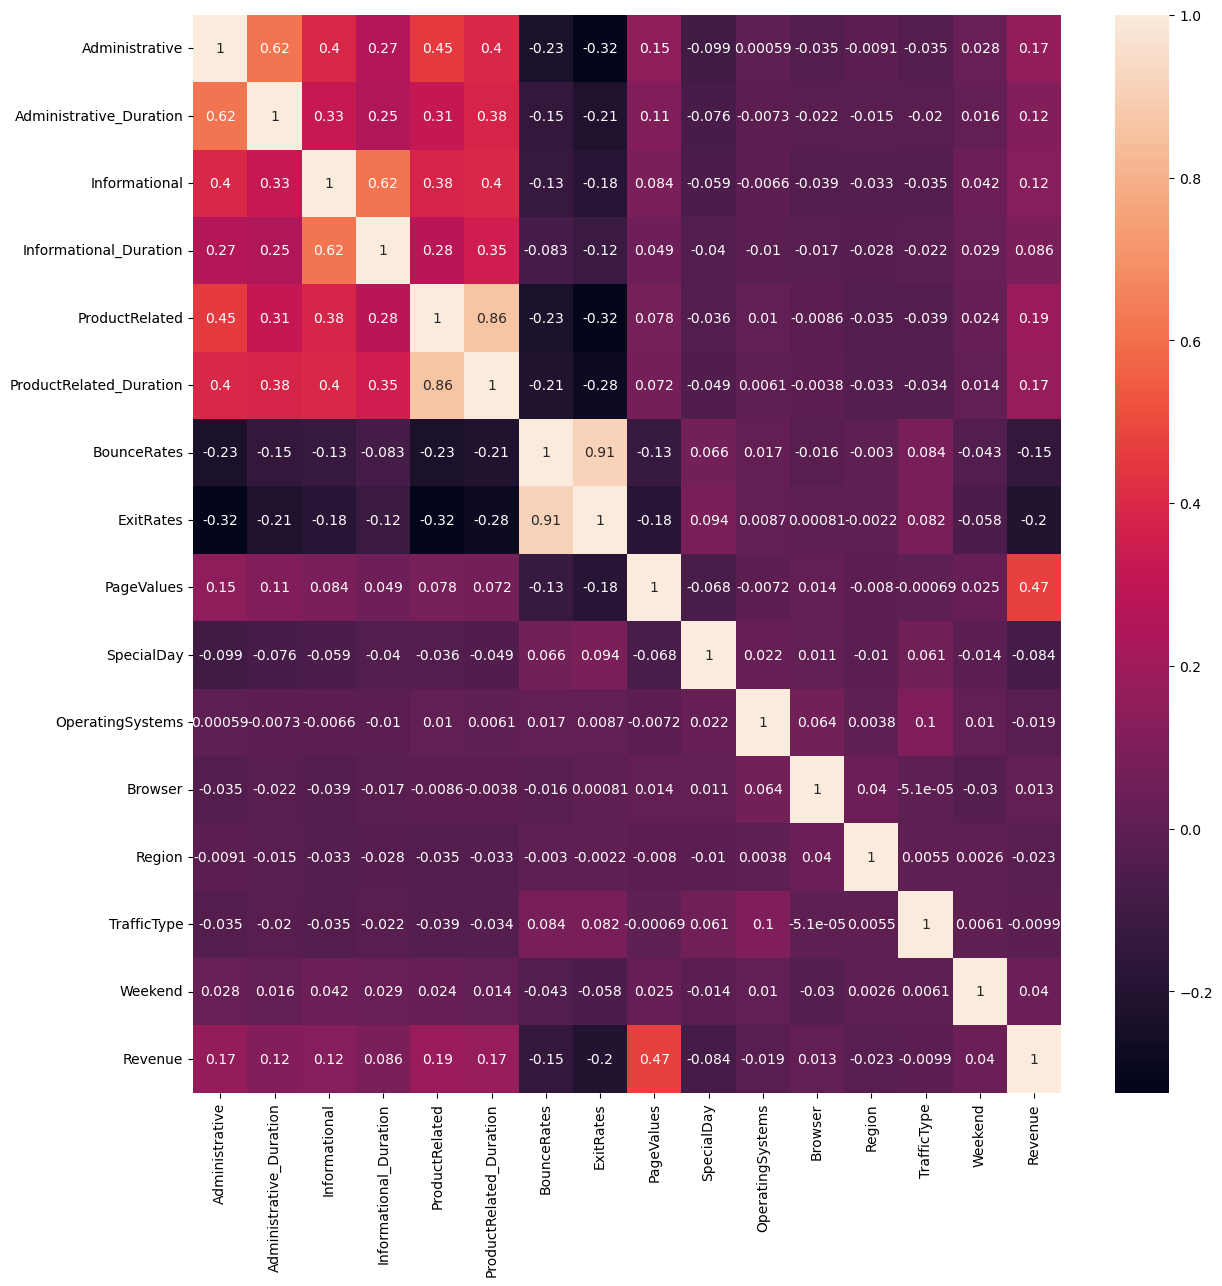

In [28]:
plt.figure(figsize=(14,14))
sns.heatmap(returning.corr(numeric_only=True), annot=True)
plt.show()

Highest:
exitrates and bouncerates: .91
pagevalues and revenue: .47

Lowest:
admin/productrelated and exitrates: -.32
productrelated_dur and exitrates: -.28

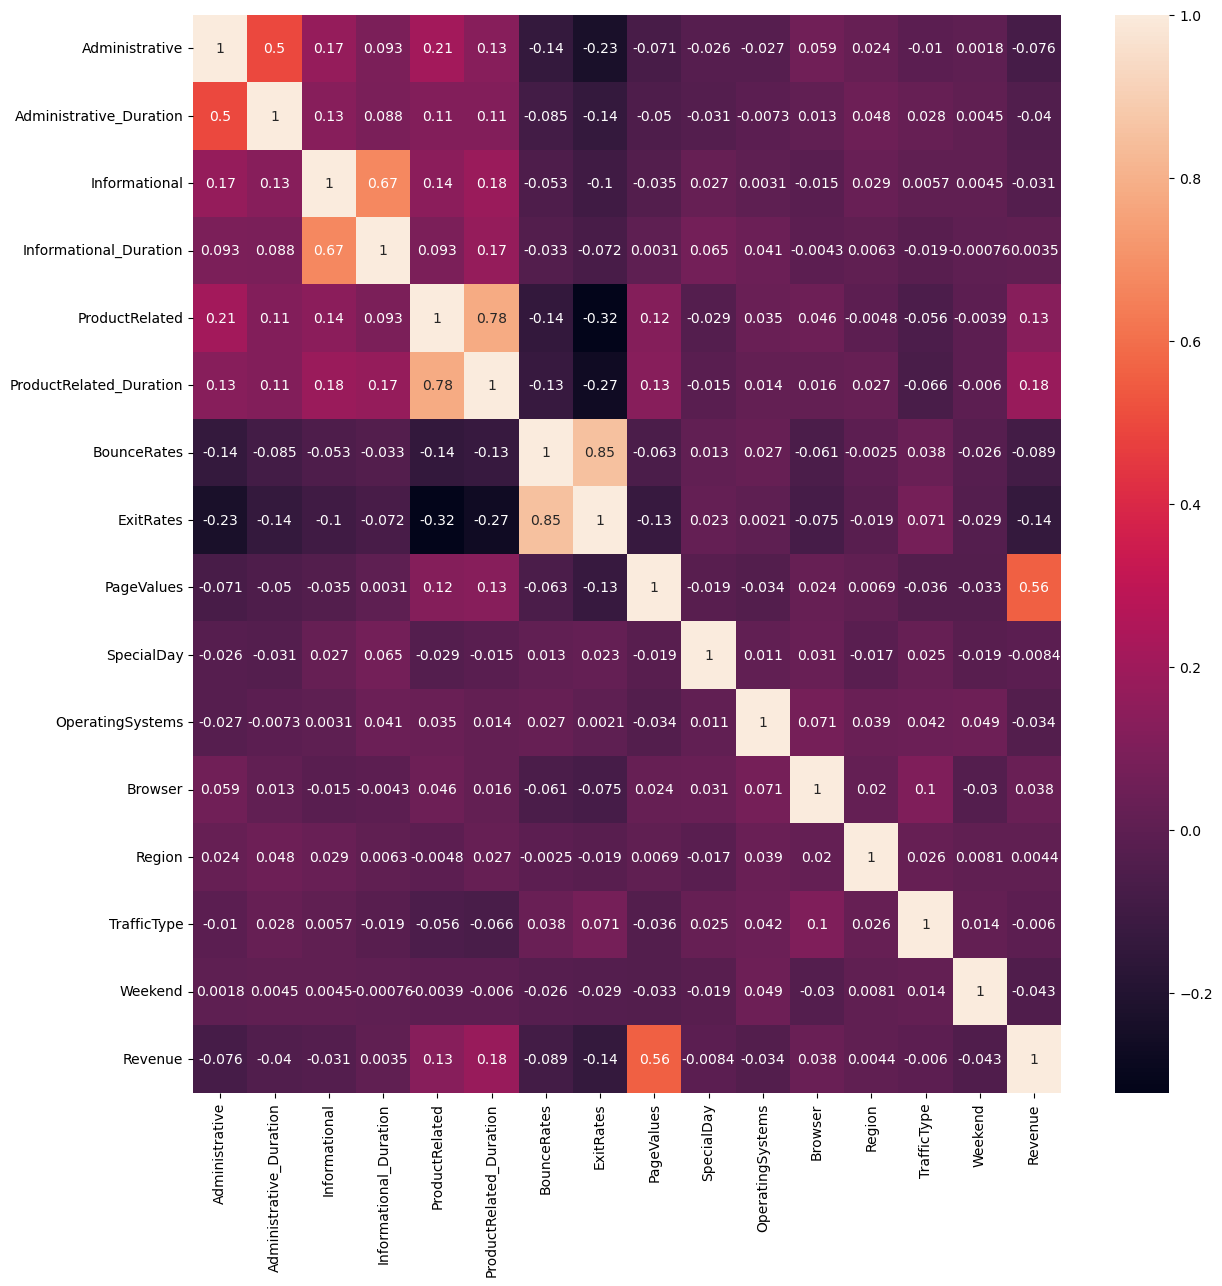

In [29]:
plt.figure(figsize=(14,14))
sns.heatmap(new.corr(numeric_only=True), annot=True)
plt.show()

Highest:
bouncerates and exitrates: .85
productrelated and productrelated_dur: .78
informational and informational_duration: .67
pagevalues and revenue: .56

Lowest:
productrelated and exitrates: -.32
productrelated_dur and exitrates: -.27
admin and exitrates: -.23

The fact that there is a similar separation between new and returning customers and buyers vs lookers makes me wonder how accurately a model could predict whether or not someone was a new or returning customer. There's also a more clear separation between the different pages and duraitons between the new and returning customers - I might test this secondarily just to see what the model decides to do.